In [ ]:
# importing libraries for doing operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset
data = pd.read_csv('compete_dataset.csv')

In [ ]:
# display the first 5 rows
data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0,1.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0,2.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0,1.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0,1.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0,1.0


Social Media Analatics is the domain 
We took parameters like Age , City layer,Slots ,Time spent in Social media and the time slots with specific Week end /week day


In [ ]:
#Checking unique values
data.userId.nunique()

54320

Need to Remove the first attribute and making UserID as Index

In [ ]:
#changing the index
data.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
# Checking the shape of our dataset
data.shape

(54320, 26)

We have 54320 rows and 26 columns in our dataset

**Mile Stone 1 completed :** Collected a dataset having 54320 rows and 25 attributes.

## **Data Preprocessing**

#### Checking for missing values

In [ ]:
# Checking the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userId                           54320 non-null  int64  
 1   tier                             54320 non-null  int64  
 2   gender                           54320 non-null  int64  
 3   following_rate                   54320 non-null  float64
 4   followers_avg_age                54320 non-null  float64
 5   following_avg_age                54320 non-null  float64
 6   max_repetitive_punc              54320 non-null  int64  
 7   num_of_hashtags_per_action       54320 non-null  float64
 8   emoji_count_per_action           54320 non-null  float64
 9   punctuations_per_action          54320 non-null  float64
 10  number_of_words_per_action       54320 non-null  float64
 11  avgCompletion                    54320 non-null  float64
 12  avgTimeSpent      

In [ ]:
# Checking for the NULL Values
data.isna().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       2
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          3
dtype: int64

In [ ]:
# We have 3 missing values in the column age group and 2 missing values in avgTimeSpent.
# Since age group is a categorical variable we can fill the missing values with mode.
data['age_group'].mode()

0    1.0
dtype: float64

In [ ]:
data['age_group'] = data['age_group'].fillna(1)

In [ ]:
# avgTimeSpent is a continuous variable so we can fill the missing values with median.
data['avgTimeSpent'] = data['avgTimeSpent'].fillna(data['avgTimeSpent'].median())

In [ ]:
data.isna().sum()

userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

Now we have filled all the missing values.

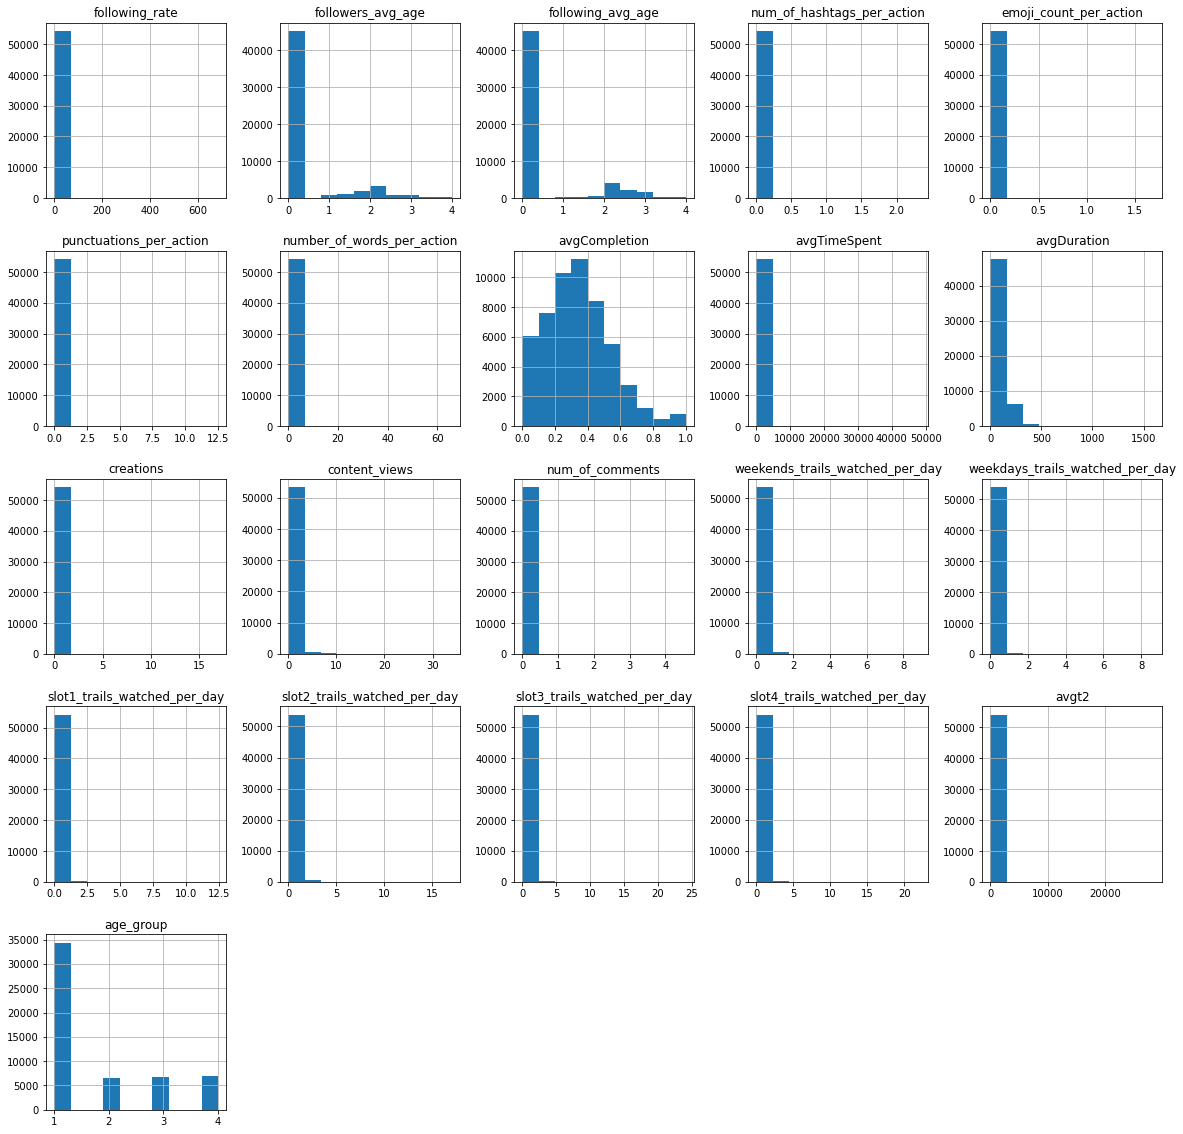

<Figure size 432x288 with 0 Axes>

In [ ]:
#Cheking skewness to plot frequency graph
frequency_graph=data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(20,20))
plt.show()
plt.tight_layout()

In [ ]:
#Checking the Stactical summary of the given dataset
data.describe()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,5.432000e+04,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,...,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,4.248125e+07,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,...,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032,1.742765
std,1.818136e+07,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,...,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984,1.092162
min,3.500000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.547567e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.344565e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000,1.000000
75%,5.370713e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286,2.000000
max,7.904176e+07,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,...,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330,4.000000


In [ ]:
#Getting coloumn name
data.columns


Index(['userId', 'tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [ ]:
data1 = data.select_dtypes(include = 'float')
data1.columns

Index(['following_rate', 'followers_avg_age', 'following_avg_age',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'creations',
       'content_views', 'num_of_comments', 'weekends_trails_watched_per_day',
       'weekdays_trails_watched_per_day', 'slot1_trails_watched_per_day',
       'slot2_trails_watched_per_day', 'slot3_trails_watched_per_day',
       'slot4_trails_watched_per_day', 'avgt2', 'age_group'],
      dtype='object')

#### Checking for outliers

Text(0.5, 1.0, 'Boxplot of Completion Rate ')

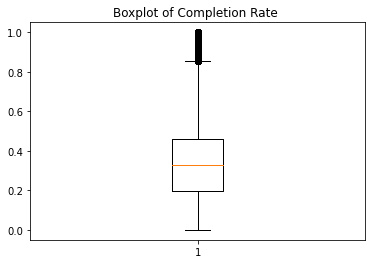

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgCompletion'])
plt.title('Boxplot of Completion Rate ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['avgCompletion'], 25, interpolation='midpoint')
Q2=np.percentile(data['avgCompletion'], 50, interpolation='midpoint')
Q3=np.percentile(data['avgCompletion'], 75, interpolation='midpoint')

In [ ]:
IQR=Q3-Q1

In [ ]:
low_limit=Q1-1.95*IQR
upper_limit=Q3+1.95*IQR


In [ ]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in data['avgCompletion']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

Text(0.5, 1.0, 'Boxplot of Completion Rate - AFTER REMOVAL ')

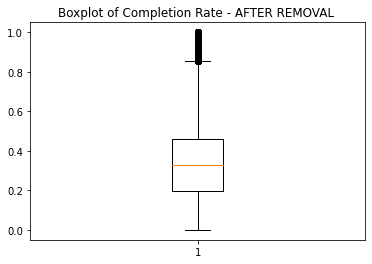

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgCompletion'])
plt.title('Boxplot of Completion Rate - AFTER REMOVAL ')

Text(0.5, 1.0, 'Boxplot of Average Rate of Time ')

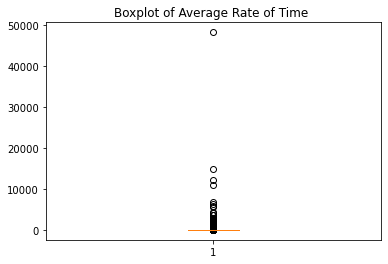

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgTimeSpent'])
plt.title('Boxplot of Average Rate of Time ')

Text(0.5, 1.0, 'Boxplot of Average Duration of Time ')

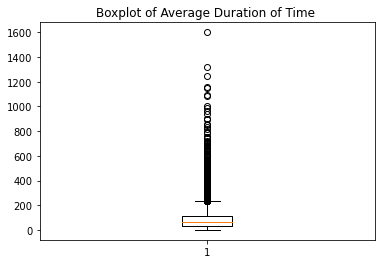

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgDuration'])
plt.title('Boxplot of Average Duration of Time ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['avgDuration'], 25, interpolation='higher')
Q2=np.percentile(data['avgDuration'], 50, interpolation='higher')
Q3=np.percentile(data['avgDuration'], 75, interpolation='higher')

In [ ]:
IQR=Q3-Q1


In [ ]:
low_limit=Q1-1.95*IQR
upper_limit=Q3+1.95*IQR
print(low_limit)
print(upper_limit)


-128.85012999999998
271.43773


In [ ]:
#Finding the Outliers in the Spirit_servings
outlier=[]
for x in data['avgDuration']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

[298.88, 457.3574, 418.085, 282.25495, 279.74925, 456.09875, 578.8395, 273.7675, 294.4423333, 321.08, 316.3825, 289.667, 273.2318667, 315.1875, 272.7675714, 398.013, 342.1733333, 325.4446, 372.384, 280.4677778, 331.153, 335.596, 279.4933333, 328.5505833, 274.091, 283.3002, 861.3895, 413.5775, 299.391, 272.5176667, 292.051, 325.08, 356.5215882, 529.04, 284.5588889, 324.1858889, 409.761875, 333.8513333, 292.426, 311.753, 550.836, 297.0003333, 337.404, 337.1344286, 348.9148333, 304.61, 289.667, 314.476, 277.9361818, 321.08, 426.0703333, 279.23925, 292.307, 383.599, 277.2, 399.5873333, 287.12, 280.3284, 388.19, 461.08, 301.1843333, 388.08, 405.126, 431.4925, 534.4413333, 375.5418333, 391.7232, 359.287, 331.153, 278.0145, 296.718, 294.563, 331.153, 271.7728462, 508.08, 568.08, 321.08, 314.96, 272.668, 437.8505, 587.75725, 451.926, 300.0, 364.8738571, 368.12475, 315.8744286, 385.34, 291.0, 319.4, 494.9795, 421.15, 289.667, 331.7703333, 331.80575, 300.0, 304.61, 437.36, 361.8606, 285.483, 411

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['avgDuration'] > upper_limit
data.loc[ind1].index

Int64Index([   20,    58,    59,    66,    92,    99,   170,   206,   253,
              287,
            ...
            53712, 53726, 53761, 53831, 53846, 53858, 53948, 54080, 54131,
            54196],
           dtype='int64', length=1212)

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

Text(0.5, 1.0, 'Boxplot of Average Rate - After outlier reduction ')

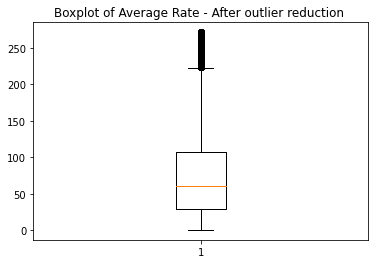

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['avgDuration'])
plt.title('Boxplot of Average Rate - After outlier reduction ')

In [ ]:
# Now we can see that our outliers are reduced.

Text(0.5, 1.0, 'Boxplot of weekdays_trails_watched_per_day  ')

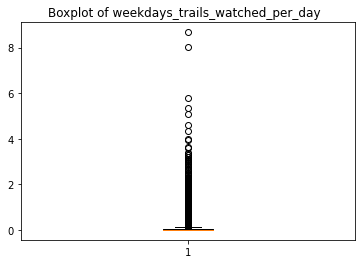

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekdays_trails_watched_per_day'])
plt.title('Boxplot of weekdays_trails_watched_per_day  ')

In [ ]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(data['weekdays_trails_watched_per_day'], 25, interpolation='nearest')
Q2=np.percentile(data['weekdays_trails_watched_per_day'], 50, interpolation='nearest')
Q3=np.percentile(data['weekdays_trails_watched_per_day'], 75, interpolation='nearest')

In [ ]:
IQR=Q3-Q1


In [ ]:
low_limit=Q1-1.99*IQR
upper_limit=Q3+1.99*IQR
print(low_limit)
print(upper_limit)


-0.11188289807
0.17492572507


In [ ]:
#Finding the Outliers in the 'weekdays_trails_watched_per_day
outlier=[]
for x in data['weekdays_trails_watched_per_day']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

[0.211428571, 0.246031746, 0.285964912, 0.332231405, 0.39245283, 0.285714286, 0.245901639, 0.471875, 0.551351351, 0.913114754, 0.388235294, 0.191666667, 1.084375, 0.342056075, 0.1808, 0.496875, 0.859016393, 0.238709677, 0.23853211, 0.396226415, 0.457657658, 0.2, 0.206557377, 0.215384615, 0.382926829, 0.287394958, 0.175206612, 0.262686567, 0.745454545, 0.810666667, 0.253781513, 0.579365079, 0.29047619, 0.480392157, 0.265822785, 0.220634921, 0.235772358, 0.178688525, 0.228571429, 0.260655738, 0.319008264, 0.18245614, 0.267241379, 0.227868852, 0.471287129, 0.224742268, 0.430985915, 0.193684211, 0.421311475, 0.751260504, 0.194782609, 0.446153846, 0.46984127, 0.346236559, 0.340952381, 0.201941748, 0.330578512, 0.377358491, 0.207142857, 0.570731707, 0.37398374, 0.265346535, 0.247244094, 0.185714286, 0.32295082, 0.449152542, 0.225806452, 0.426086957, 0.591596639, 0.855, 0.274782609, 0.31147541, 0.183606557, 0.2576, 0.305785124, 2.087234043, 0.225806452, 0.244444444, 0.227419355, 0.493333333, 

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['weekdays_trails_watched_per_day'] > upper_limit
data.loc[ind1].index

Int64Index([    2,    13,    23,    26,    40,    46,    60,    63,    81,
              108,
            ...
            54233, 54261, 54274, 54279, 54286, 54289, 54301, 54304, 54311,
            54312],
           dtype='int64', length=5227)

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

Text(0.5, 1.0, 'Boxplot of weekdays_trails_watched_per_day -After outlier reduction ')

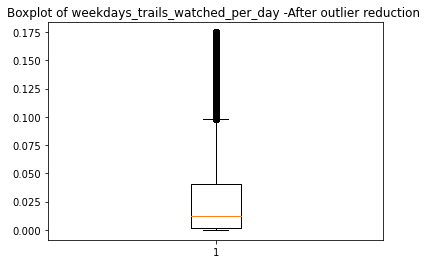

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekdays_trails_watched_per_day'])
plt.title('Boxplot of weekdays_trails_watched_per_day -After outlier reduction ')

Now we can see that out outliers are reduced

Text(0.5, 1.0, 'Boxplot of Weekends')

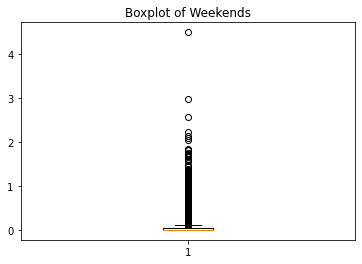

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekends_trails_watched_per_day'])
plt.title('Boxplot of Weekends')

In [ ]:
Q1=np.percentile(data['weekends_trails_watched_per_day'], 25, interpolation='nearest')
Q2=np.percentile(data['weekends_trails_watched_per_day'], 50, interpolation='nearest')
Q3=np.percentile(data['weekends_trails_watched_per_day'], 75, interpolation='nearest')
IQR=Q3-Q1

In [ ]:
low_limit=Q1-1.95*IQR
upper_limit=Q3+1.95*IQR
print(low_limit)
print(upper_limit)


-0.0898026324
0.1358552644


In [ ]:
outlier=[]
for x in data['weekends_trails_watched_per_day']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)
print(outlier)

[0.396, 0.228, 0.228, 0.193548387, 0.483050847, 0.376068376, 0.141129032, 0.590909091, 0.156, 0.229166667, 0.186507937, 0.168, 0.992063492, 0.293814433, 0.232, 0.144067797, 0.138888889, 0.144067797, 0.272, 0.208, 0.217741935, 0.188034188, 0.564, 0.24, 0.23553719, 0.257142857, 0.298701299, 0.155462185, 0.196, 0.276, 0.266666667, 0.241525424, 0.506281407, 0.163934426, 0.190677966, 0.244, 0.272, 0.157407407, 0.394736842, 0.192622951, 0.188, 0.356, 0.432291667, 0.579831933, 0.136, 0.604545455, 0.373015873, 0.368, 0.239583333, 0.137931034, 0.188, 0.440677966, 0.477477477, 0.204081633, 0.368852459, 0.206140351, 0.579365079, 0.436893204, 0.258333333, 0.175, 0.147058824, 0.194915254, 0.19047619, 0.443548387, 0.163934426, 0.45045045, 0.203389831, 0.162393162, 0.169354839, 0.13671875, 0.172727273, 0.173202614, 0.3625, 0.1640625, 0.183760684, 0.254237288, 0.256, 0.31092437, 0.46, 0.152380952, 0.62, 0.407563025, 0.548076923, 0.266129032, 0.258064516, 0.218253968, 0.295833333, 0.3, 0.796875, 0.26, 

In [ ]:
# We have all the upper limit values as outliers
# finding the index values of outlier
ind1 = data['weekends_trails_watched_per_day'] > upper_limit
data.loc[ind1].index

Int64Index([    7,    18,    28,    39,    45,    89,   105,   110,   112,
              132,
            ...
            54263, 54264, 54265, 54273, 54275, 54297, 54300, 54306, 54307,
            54317],
           dtype='int64', length=5333)

In [ ]:
#Droping the values
data.drop(data.loc[ind1].index, inplace=True)

Text(0.5, 1.0, 'Boxplot of Weekends - After outlier reduction')

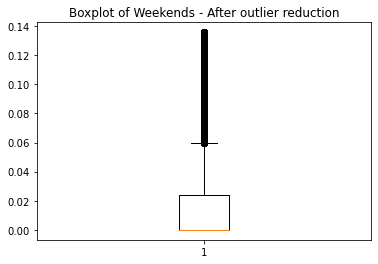

In [ ]:
#Boxplot to find out outlier
plt.boxplot(data['weekends_trails_watched_per_day'])
plt.title('Boxplot of Weekends - After outlier reduction')

Now we can see that our outliers are reduced

### Feature reduction

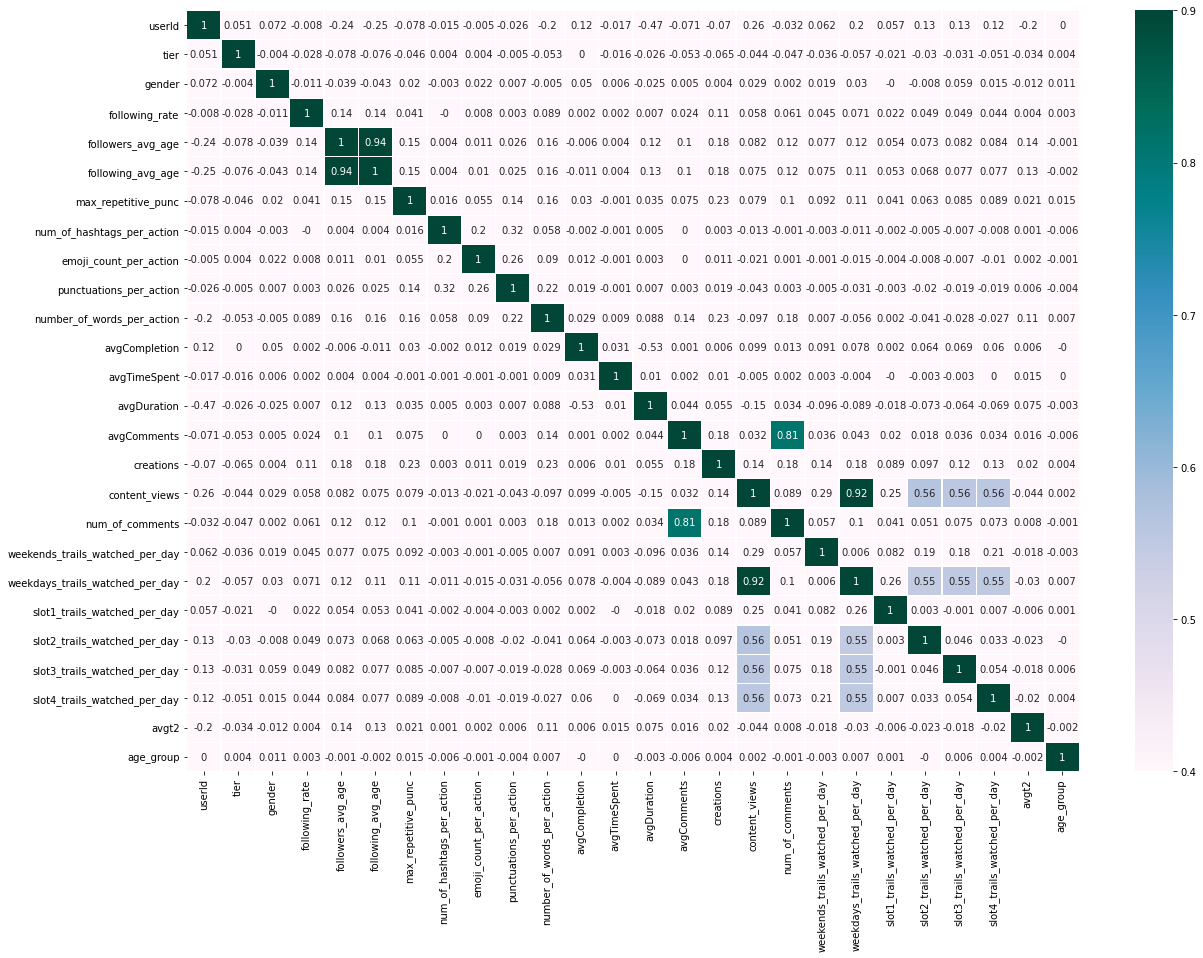

<Figure size 432x288 with 0 Axes>

In [ ]:
#Taking the corelation matrix
corelation_matrix=data.corr().round(3)
plt.subplots(figsize=(20,14))
sns.heatmap(corelation_matrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='PuBuGn')
plt.show()
plt.tight_layout()

In [ ]:
# Sorting values in correlation matrix
correlation_mat = data.corr()

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

avgCompletion                 avgDuration                    -0.524931
avgDuration                   avgCompletion                  -0.524931
                              userId                         -0.470749
userId                        avgDuration                    -0.470749
                              following_avg_age              -0.251659
                                                                ...   
slot1_trails_watched_per_day  slot1_trails_watched_per_day    1.000000
slot2_trails_watched_per_day  slot2_trails_watched_per_day    1.000000
slot3_trails_watched_per_day  slot3_trails_watched_per_day    1.000000
avgTimeSpent                  avgTimeSpent                    1.000000
age_group                     age_group                       1.000000
Length: 676, dtype: float64


In [ ]:
#Data Droping due to low co-relation 
final_data=data.drop(['userId','max_repetitive_punc','punctuations_per_action','number_of_words_per_action','avgComments','creations','num_of_comments','content_views', 'avgt2'],axis=1)

Removed the above attibutes from the table since it have less significant

In [ ]:
final_data.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,num_of_hashtags_per_action,emoji_count_per_action,avgCompletion,avgTimeSpent,avgDuration,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,age_group
count,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000
mean,1.988742,1.204122,0.029521,0.277805,0.329991,0.000414,0.001062,0.332975,18.087127,79.717927,0.017940,0.027226,0.012531,0.052807,0.052386,0.054286,1.741421
std,0.419953,0.403064,0.419386,0.739915,0.853921,0.016804,0.019315,0.202446,274.072516,61.581349,0.031132,0.036270,0.051387,0.102612,0.100913,0.103306,1.092660
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003762,1.000000,0.767000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183869,5.222222,26.776435,0.000000,0.001802,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312767,8.000000,63.988024,0.000000,0.012458,0.000000,0.002016,0.004008,0.005618,1.000000
75%,2.000000,1.000000,0.007812,0.000000,0.000000,0.000000,0.000000,0.449266,12.666667,117.694408,0.023810,0.036975,0.000000,0.061947,0.061224,0.064000,2.000000
max,3.000000,2.000000,42.055556,4.000000,4.000000,2.333333,1.692308,1.000000,48286.500000,271.413750,0.135714,0.174803,0.915888,1.025210,0.898305,1.039683,4.000000


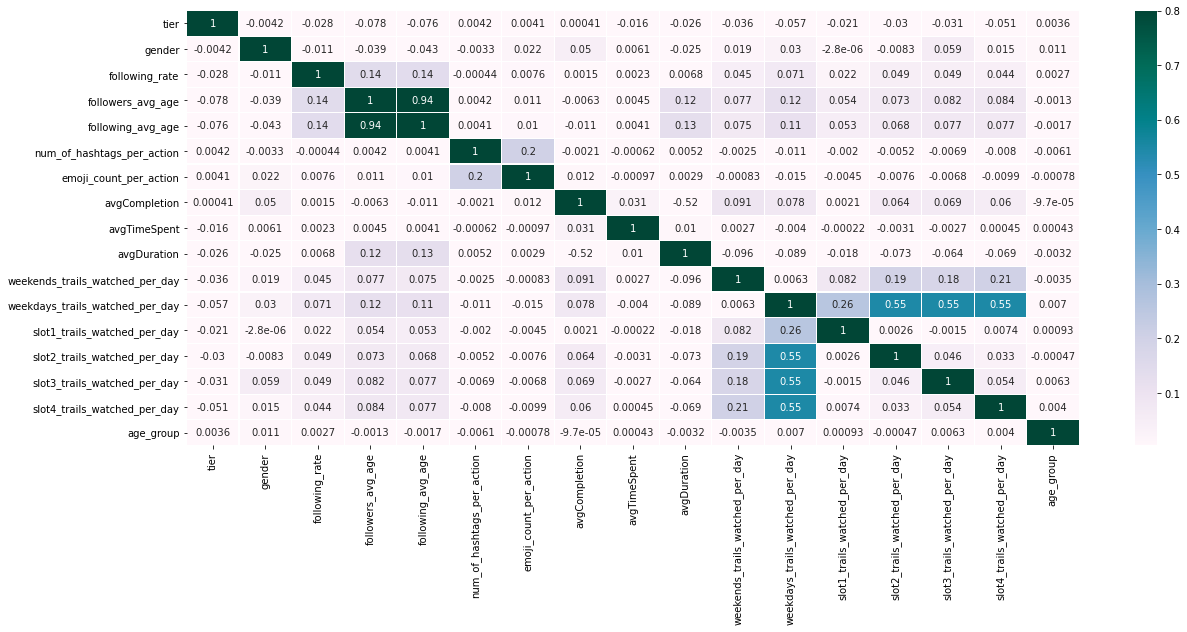

In [ ]:
#Taking the corelation matrix
corelation_matrix=final_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corelation_matrix, vmin=0.004, vmax=0.8, annot=True, linewidths=0.2, cmap='PuBuGn')
plt.show()

In [ ]:
final_data.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'num_of_hashtags_per_action',
       'emoji_count_per_action', 'avgCompletion', 'avgTimeSpent',
       'avgDuration', 'weekends_trails_watched_per_day',
       'weekdays_trails_watched_per_day', 'slot1_trails_watched_per_day',
       'slot2_trails_watched_per_day', 'slot3_trails_watched_per_day',
       'slot4_trails_watched_per_day', 'age_group'],
      dtype='object')

In [ ]:
# Selecting our target variable and independent variables
# We have the predict the average age group of people who are using social media based on the other parameters.
# so our target variable (y) will be age group and all the others will be our independent variables (x).
y = data['age_group']
X = data.drop('age_group', axis =1)

In [ ]:
# Checking shape of X
X.shape

(42548, 25)

In [ ]:
# Checking statistical summary
X.describe()

,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,4.254800e+04,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,...,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000,42548.000000
mean,4.159389e+07,1.988742,1.204122,0.029521,0.277805,0.329991,0.532199,0.000414,0.001062,0.014378,...,0.008170,0.146143,0.000764,0.017940,0.027226,0.012531,0.052807,0.052386,0.054286,160.524737
std,1.886999e+07,0.419953,0.403064,0.419386,0.739915,0.853921,2.097562,0.016804,0.019315,0.145764,...,0.031371,0.163736,0.006812,0.031132,0.036270,0.051387,0.102612,0.100913,0.103306,977.304884
min,5.747000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.465668e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.032520,0.000000,0.000000,0.001802,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.278686e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.087302,0.000000,0.000000,0.012458,0.000000,0.002016,0.004008,0.005618,0.000000
75%,5.330262e+07,2.000000,1.000000,0.007812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008197,0.196721,0.000000,0.023810,0.036975,0.000000,0.061947,0.061224,0.064000,174.875000
max,7.904176e+07,3.000000,2.000000,42.055556,4.000000,4.000000,55.000000,2.333333,1.692308,12.500000,...,3.870833,1.181818,0.552036,0.135714,0.174803,0.915888,1.025210,0.898305,1.039683,28474.333330


### Normalisation

In [ ]:
# Let's scale our dataset for a better output
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.428095,0.5,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,...,0.00000,0.052602,0.0,0.000000,0.072072,0.000000,0.000000,0.070123,0.000000,0.000000
1,0.023061,0.5,0.0,0.000043,0.00,0.00,0.000000,0.0,0.0,0.0,...,0.00000,0.002340,0.0,0.000000,0.004161,0.000000,0.000000,0.004048,0.000000,0.000000
2,0.463242,0.5,1.0,0.000000,0.00,0.00,0.072727,0.0,0.0,0.0,...,0.00205,0.140391,0.0,0.497076,0.036322,0.000000,0.108379,0.026505,0.030534,0.007059
3,0.499503,0.5,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,...,0.00000,0.197298,0.0,0.861630,0.000000,0.255349,0.000000,0.000000,0.000000,0.000000
4,0.537833,0.0,0.0,0.000193,0.25,0.75,0.000000,0.0,0.0,0.0,...,0.00210,0.061221,0.0,0.000000,0.074416,0.000000,0.000000,0.072404,0.000000,0.002072


Now our data set is scaled, ie. all the values lies between 0 and 1

**Mile Stone 2 completed :** Finished data preprocessing

# **Exploratory Data Analysis**

### Let's visualize the data

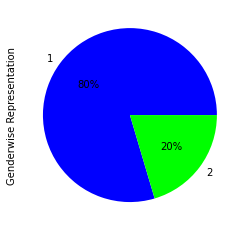

In [ ]:
# Let's draw a pie chart showing the genderwise representation
data['gender'].value_counts().plot.pie(label=('Genderwise Representation'),colormap='brg', autopct='%1.0f%%') 
plt.show()

We can infer that 80% of the people belongs to gender1 (male).

In [ ]:
# Creating a cross tab based on tier and gender
pd.crosstab(data.gender, data.tier)  

tier,1,2,3
gender,,,
1,3156,27902,2805
2,838,7137,710


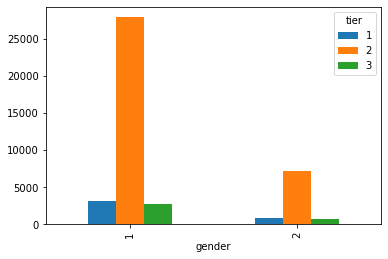

<Figure size 864x1008 with 0 Axes>

In [ ]:
# Let's plot a bar graph
pd.crosstab(data.gender, data.tier).plot(kind='bar')
plt.figure(figsize=(12,14))
plt.tight_layout()
plt.show()

From the plot we can see that the majority of all persons are  from Tier 2 city and most of them belong to gender1 (male)

In [ ]:
# Creating a cross tab based on age group and gender
pd.crosstab(data.gender, data.age_group)

age_group,1.0,2.0,3.0,4.0
gender,,,,
1,21557,3970,4073,4263
2,5376,1103,1080,1126


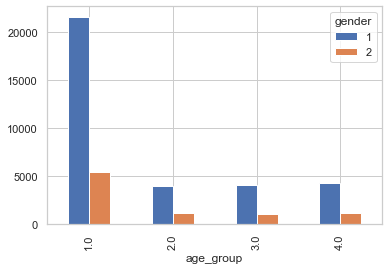

<Figure size 864x1008 with 0 Axes>

In [ ]:
# Let's plot a bar graph
pd.crosstab(data.age_group, data.gender).plot(kind='bar')
plt.figure(figsize=(12,14))
plt.tight_layout()
plt.show()

We can see that most of the people in our data set belongs to the first age group (ie, less than 18)

In [ ]:
data.columns

Index(['userId', 'tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

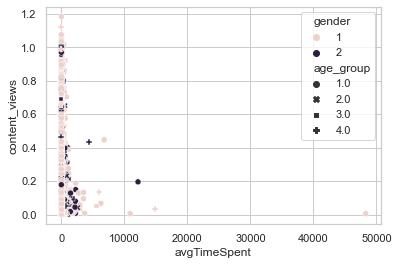

In [ ]:
# Let's check who got more content views according to the time they spend 
avg_time_hrs = data['avgTimeSpent']/3600
sns.scatterplot(data=data, x="avgTimeSpent", y="content_views", hue="gender", style="age_group")
plt.show()

From the above plot we can infer that gender1 (male) spend more time in social media and they got more viewers than the female.
Young age people are getting more content views than others

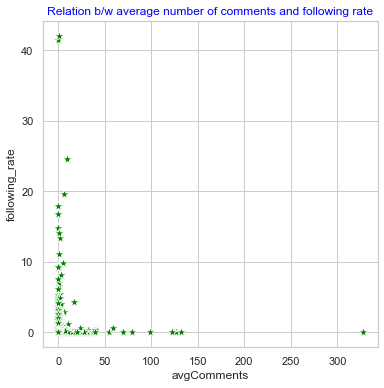

In [ ]:
# Let's check the relation between  average number of comments and following rate
plt.figure(figsize=(6,6))
sns.set(style='whitegrid')
sns.scatterplot(data= data, x="avgComments", y="following_rate",s=100, color="green", marker="*")
# plt.scatter(data['avgComments'],data['following_rate'],  s=10, c='brown')
plt.title('Relation b/w average number of comments and following rate', fontsize = 12, color = 'blue')
plt.xlabel('avgComments')
plt.ylabel('following_rate')
plt.show()

From the plot we can see even though some people are getting less comments, they have more following rate. On the other side some are getting more comments, but less followers.

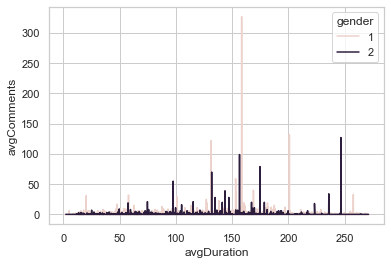

In [ ]:
# Let's see who spend more time on social media by gender
sns.lineplot(data=data,x="avgDuration", y="avgComments", hue="gender",markers=True, dashes=False)
plt.show()

We can see that gender1 spent more time in social media than gender 2

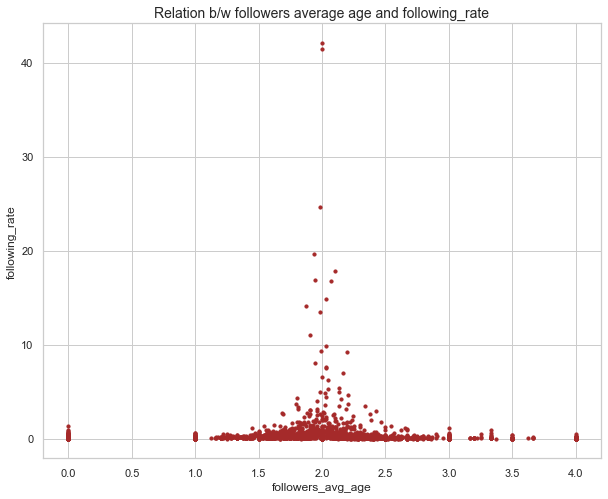

In [ ]:
# Let's check the relation between following rate and followers average age
plt.figure(figsize=(10,8))
plt.scatter(data['followers_avg_age'],data['following_rate'],  s=10, c='brown')
plt.title('Relation b/w followers average age and following_rate', fontsize = 14)
plt.xlabel('followers_avg_age')
plt.ylabel('following_rate')
plt.show()

From the data we can see that majority of the followers are of young age (15-25).

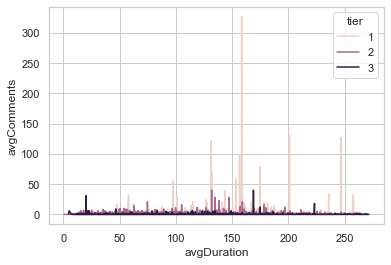

In [ ]:
# Let's see who comments more based on tier
sns.lineplot(data=data,
    x="avgDuration", y="avgComments", hue="tier")
plt.show()

We can see that people from Tier1 are more activitely interacting in social media

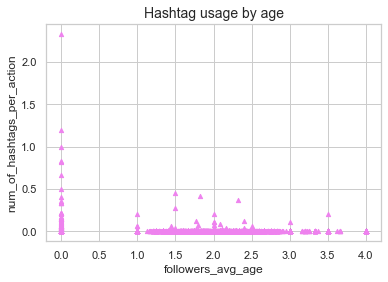

In [ ]:
# let's check which age group uses more hash tags
plt.figure(figsize=(6,4))
plt.scatter(data['followers_avg_age'],data['num_of_hashtags_per_action'],s=18, c='violet', marker = "^")
plt.title('Hashtag usage by age', fontsize = 14)
plt.xlabel('followers_avg_age')
plt.ylabel('num_of_hashtags_per_action')
plt.show()

From the plot we can see that hash tags are mainly used by children. Others are also using it.

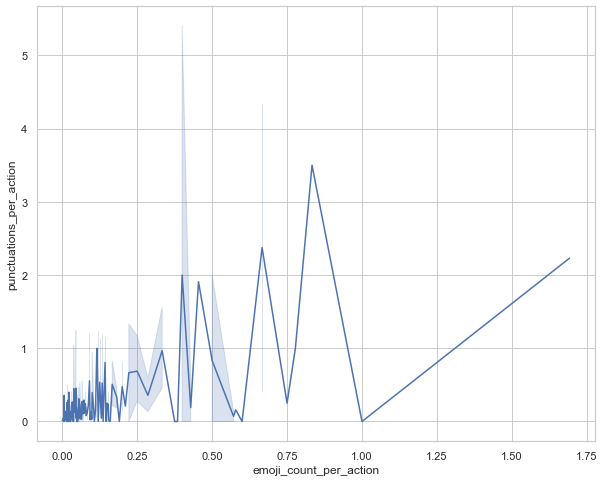

In [ ]:
# Let's check the dependence between emoji's and punctuations
plt.figure(figsize=(10,8))
sns.lineplot(data=data,x="emoji_count_per_action", y="punctuations_per_action")
plt.show()

We can see that the emoji per action and number of punctuations are related to each other.

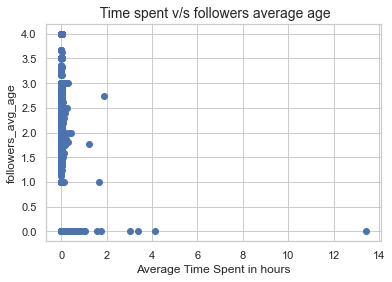

In [ ]:
# Let's see how much time the followers are spending in social media based on their age
plt.figure(figsize=(6,4))
plt.scatter(data['avgTimeSpent']/3600, data['followers_avg_age'])
plt.title(' Time spent v/s followers average age', fontsize = 14)
plt.xlabel('Average Time Spent in hours')
plt.ylabel('followers_avg_age')
plt.show()


We can see that the children are spending maximum time in social media. The spend an average of 2-4 hours per day and some chidren are spending nearly 14 hrs per day!!

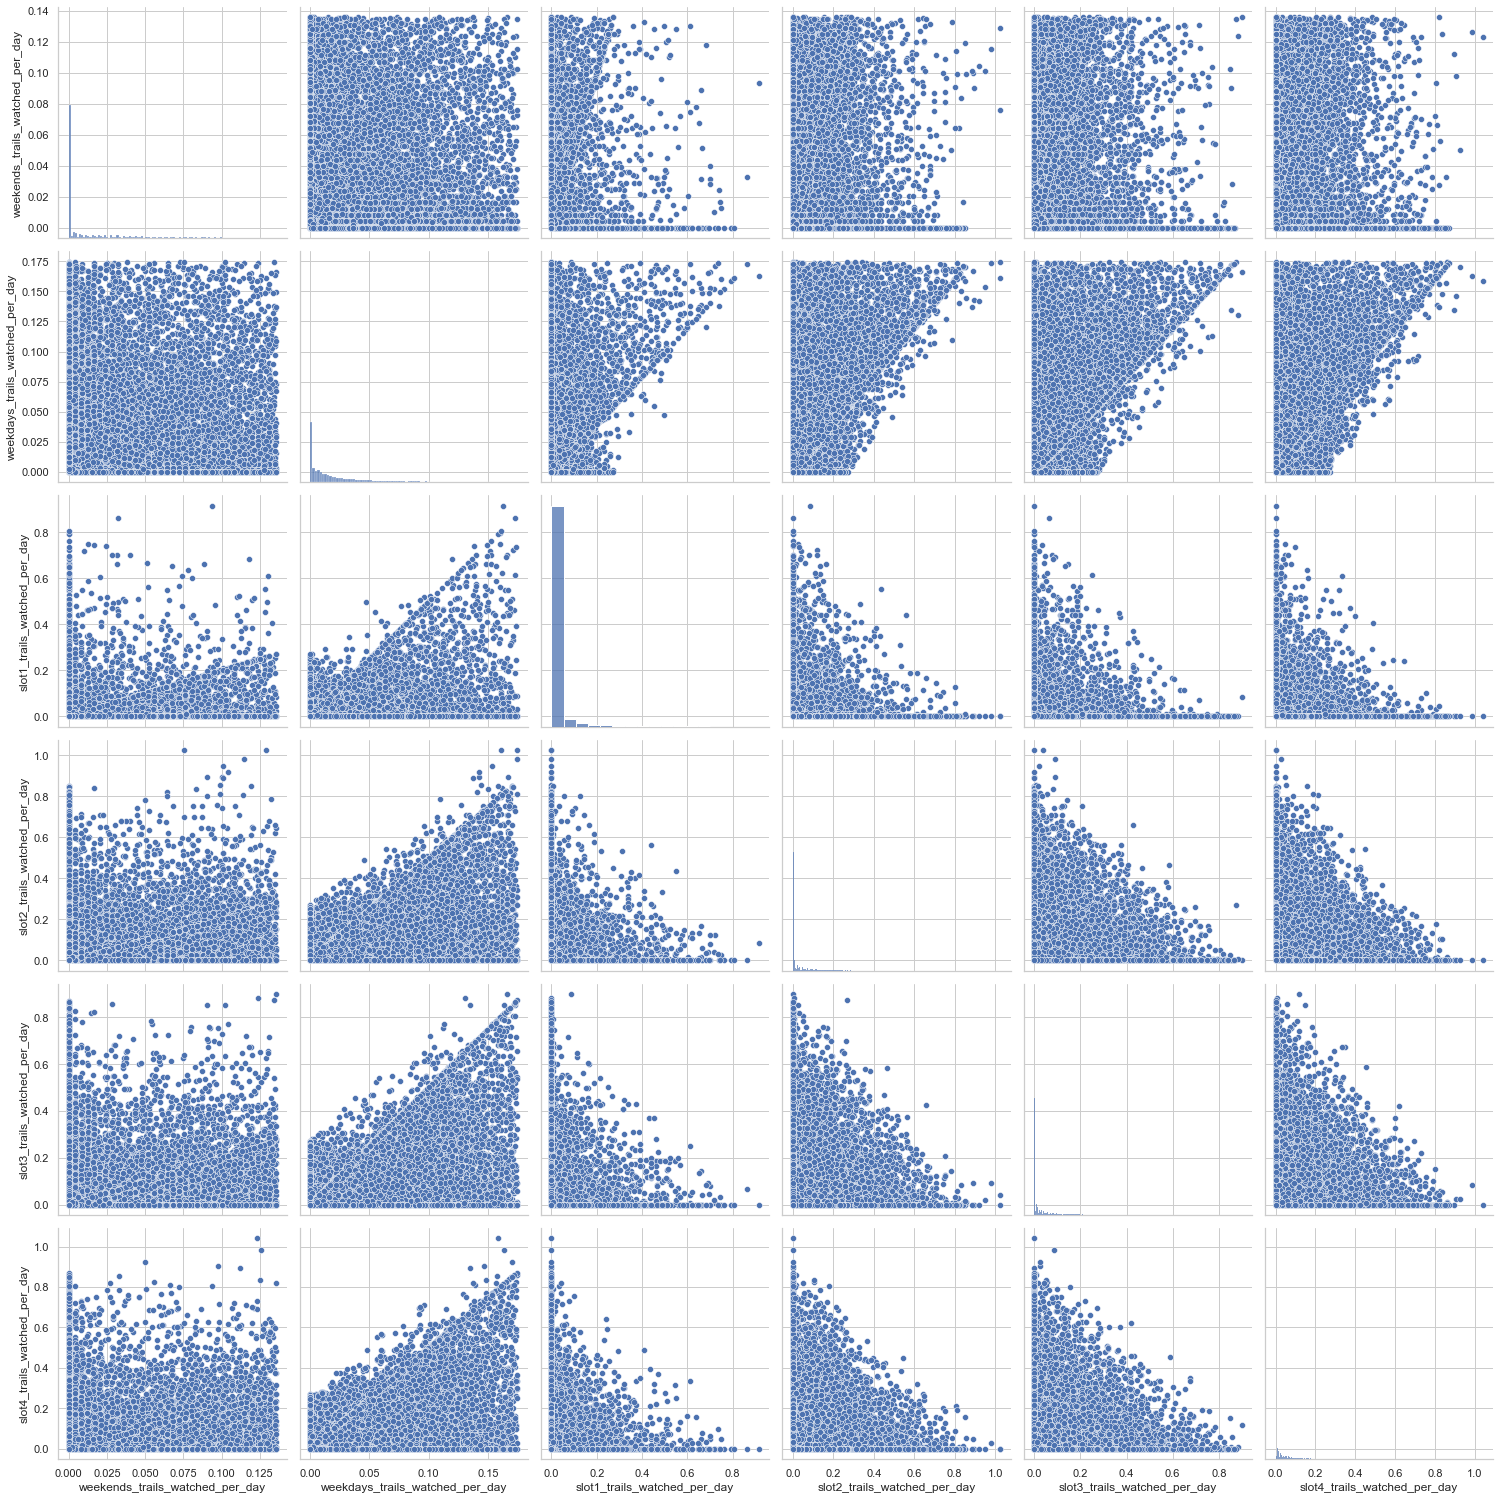

In [ ]:
# Now let's go for pairplots to see the most active time slots in week days and week ends
sns.pairplot(data[['weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day']], height = 3.5)
plt.tight_layout()

We can see that slot 3 and slot 4 are the most active time slots at  both week days and week ends

**Mile Stone 3 completed :** We have done an exploratory analysis on the given dataset.

# Modelling
Objective :- Age prediciton of users based on the time spend and the other parameters like emotion and hasttag

In [ ]:
# First let's split or data into train and test.
from sklearn.model_selection import train_test_split
# Creating instance
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=65, test_size = 0.25)

In [ ]:
X_train.shape

(31911, 25)

In [ ]:
X_test.shape

(10637, 25)

In [ ]:
#Let's try  different models and find the best one by  checking the f1 score and  accuracy score of each.

#### Logistic Regression 

In [ ]:
# Creating a model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class = 'multinomial')
logistic_model.fit(X_train,y_train)
y_prediction = logistic_model.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.00      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.16      0.25      0.19     10637
weighted avg       0.40      0.64      0.49     10637



#### SVM

In [ ]:
# linear classifier
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.25      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.22      0.25      0.19     10637
weighted avg       0.44      0.64      0.49     10637



#### Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.25      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.22      0.25      0.19     10637
weighted avg       0.44      0.64      0.49     10637



#### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.00      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.16      0.25      0.19     10637
weighted avg       0.40      0.64      0.49     10637



#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.00      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.16      0.25      0.19     10637
weighted avg       0.40      0.64      0.49     10637



#### knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Find the optimum k value, for this we have to create a model with varied k values.
# For that first creating an empty list
acc_values = []
# taking values from 3 to 15 to a variable
neighbors = np.arange(3,33)
# Create a loop to create knn models for each k value
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_prediction = classifier.predict(X_test)
    acc= accuracy_score(y_test, y_prediction)
    acc_values.append(acc)
acc_values

[0.5608724264360252,
 0.5740340321519225,
 0.5870076149290213,
 0.600639277991915,
 0.6061859546864717,
 0.6110745510952336,
 0.6174673310143838,
 0.6221679044843471,
 0.6247062141581273,
 0.6267744664849112,
 0.6279966155871016,
 0.6282786499952995,
 0.6304409137914826,
 0.6317570743630723,
 0.6321331202406694,
 0.6333552693428598,
 0.6337313152204569,
 0.6338253266898561,
 0.6339193381592554,
 0.6342953840368525,
 0.6345774184450503,
 0.6352354987308452,
 0.6351414872614459,
 0.6351414872614459,
 0.6352354987308452,
 0.6351414872614459,
 0.6351414872614459,
 0.6352354987308452,
 0.6354235216696437,
 0.6354235216696437]

Text(0, 0.5, 'accuracy')

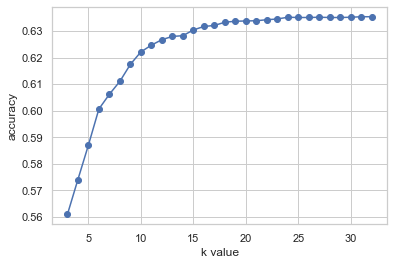

In [ ]:
# 0.6354 is the highest accuracy value. Let's find the corresponding k value
# For that we plot a graph between the neighbor values (k values) and the accuracy values.
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
# We can see that the best accuracy is for k value 25. Now we can make a model with k=7
classifier = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
classifier.fit(X_train, y_train)
y_prediction = classifier.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.25      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.22      0.25      0.19     10637
weighted avg       0.44      0.64      0.49     10637



We have tried 6 different models. All models give us an accuracy and precision values of 64%.
So Let's go for a hyper-parametric tuning.

**Mile Stone 4 completed :** Modelling completed

# Model Fine Tuning

In [ ]:
# Let's do a fine tuning on some of the above models and see if there is any change in the accuracy scores

#### SVM

In [ ]:
# Polynomial SVM
svm_poly = SVC(kernel ='poly', degree=3, gamma ='auto')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)

In [ ]:
# For testing the goodness of fit of model
# generate evaluation metrics
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         1.0       0.64      1.00      0.78      6758
         2.0       0.00      0.00      0.00      1244
         3.0       0.00      0.00      0.00      1289
         4.0       0.25      0.00      0.00      1346

    accuracy                           0.64     10637
   macro avg       0.22      0.25      0.19     10637
weighted avg       0.44      0.64      0.49     10637



In [ ]:
svm_poly = SVC(kernel ='rbf', decision_function_shape ='ovo', random_state=102, degree=5)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print("The accuracy score using polynomial svm is ", accuracy_score(y_test,y_prediction))

The accuracy score using polynomial svm is  0.6351414872614459


In [ ]:
# Radial SVM
svm_radial = SVC(kernel ='rbf')
svm_radial.fit(X_train, y_train)
y_pred = svm_radial.predict(X_test)
print("The accuracy score using radial svm is ", accuracy_score(y_test,y_pred))

The accuracy score using radial svm is  0.6353295102002444


#### Random Forest

In [ ]:
rft = RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=42, criterion = "entropy")
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
print("The accuracy score using modified  random forest classifier is ", accuracy_score(y_test,y_pred))

The accuracy score using modified  random forest classifier is  0.6353295102002444
